<a href="https://colab.research.google.com/github/ankitkumar-128/CaseStudy-Marketsegmentation-McD/blob/main/Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


In [13]:
df = pd.read_csv('mcdonalds.csv')

In [14]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


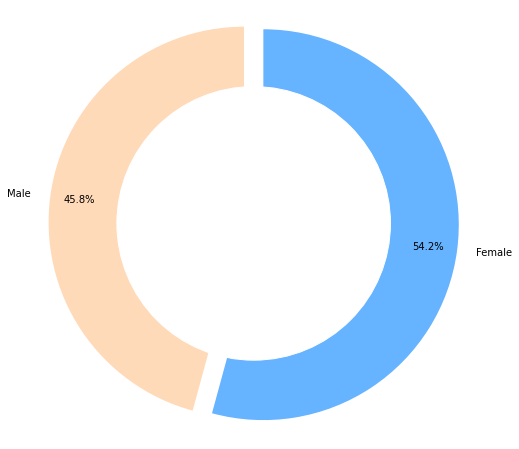

In [15]:
labels = ['Male','Female']
sizes = [df.query('Gender == "Male"').Gender.count(),df.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

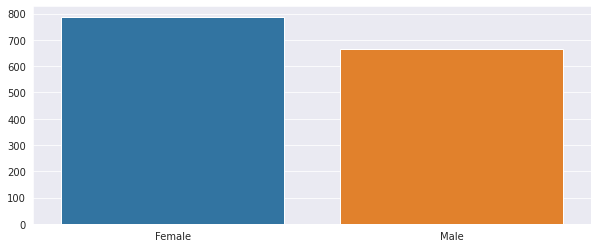

In [26]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [32]:
df.drop(['Like', 'Age', 'VisitFrequency', 'Gender'], axis=1, inplace= True)

In [65]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,False,True,False,True,False,True,True,False,True,False,False
1,True,True,False,True,True,True,True,True,True,False,False
2,False,True,True,True,True,True,False,True,True,True,False
3,True,True,False,True,True,True,True,True,False,False,True
4,False,True,False,True,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1448,False,True,False,True,True,False,False,False,True,False,True
1449,True,True,False,True,False,False,True,True,False,True,False
1450,True,True,False,True,False,True,False,True,True,False,False
1451,True,True,False,False,False,True,True,True,False,True,False


In [66]:
df = df.replace({'False':0, 'True': 1})
df


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,False,True,False,True,False,True,True,False,True,False,False
1,True,True,False,True,True,True,True,True,True,False,False
2,False,True,True,True,True,True,False,True,True,True,False
3,True,True,False,True,True,True,True,True,False,False,True
4,False,True,False,True,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1448,False,True,False,True,True,False,False,False,True,False,True
1449,True,True,False,True,False,False,True,True,False,True,False
1450,True,True,False,True,False,True,False,True,True,False,False
1451,True,True,False,False,False,True,True,True,False,True,False


In [68]:
df.replace({False: 0, True: 1}, inplace=True)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


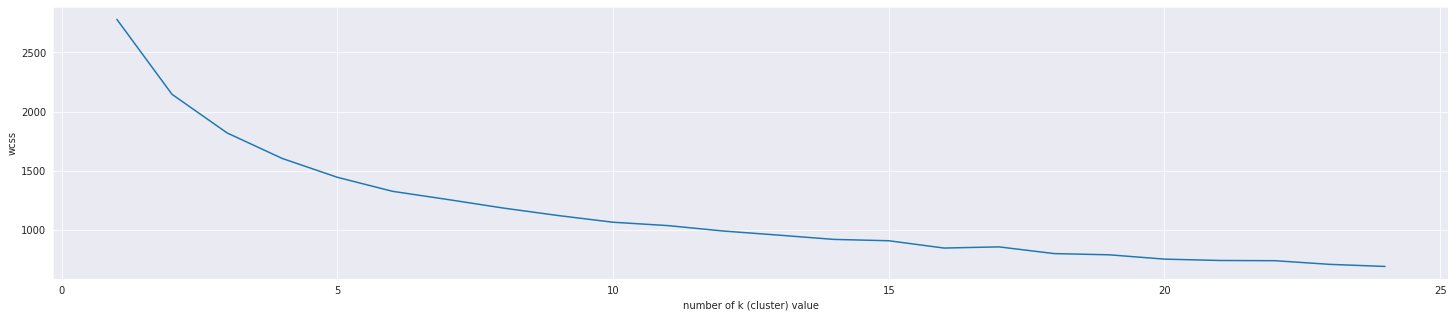

In [73]:
wcss = []
for k in range(1,25):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# the best value is elbow value. It's 5.
plt.figure(figsize=(25,5))
plt.plot(range(1,25),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

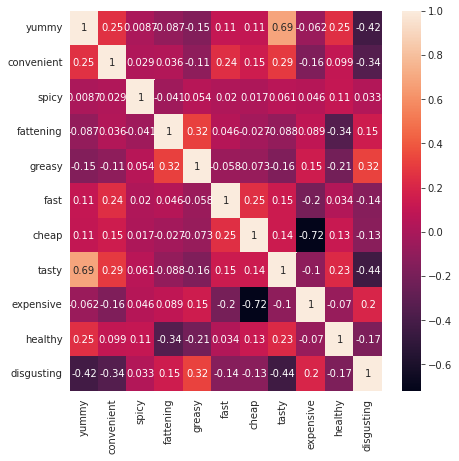

In [85]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [97]:
# distributing the dataset into two components X and Y
X = df.iloc[:, 0:13].values
y = df.iloc[:, 0:13].values
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)
# making confusion matrix between
# test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()



ValueError: ignored